Glucose Level Prediction project using machine learning



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.


This project focuses on predicting glucose levels using health-related features from the Framingham Heart Study dataset.
We approach this as a binary classification problem, where glucose levels are categorized as normal or high based on a clinical threshold (≥126 mg/dL).

# Glucose Level Prediction Project
# Predicting glucose levels (as a classification task) using the Framingham dataset.


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

In [4]:
# Import and explore the `framingham.csv` dataset
# Step 2: Load and Explore the Dataset
df = pd.read_csv("/Users/nikhilreddyponnala/Desktop/Machine Learning project/Glucose Level Prediction Project/Dataset/framingham.csv")  # Replace with your path if needed

# Show the first few rows
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
# Step 3: Data Cleaning

# Clean the data (handle nulls, correct formats, etc.).

# Check for missing values

print(df.isnull().sum())

# Drop rows where glucose is missing
df = df.dropna(subset=['glucose'])

# Fill remaining nulls with median (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Create a new target column: classify glucose as high (1) or normal (0)
df['glucose_level'] = df['glucose'].apply(lambda x: 1 if x >= 126 else 0)  # 126 mg/dL is standard diabetes threshold

# Drop the original glucose column (optional)
df.drop(columns=['glucose'], inplace=True)

df['glucose_level'].value_counts()


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


glucose_level
0    3766
1      86
Name: count, dtype: int64

In [ ]:
# Step 4: Visualizations

# Visualize the distribution of glucose and related health indicators.

# Glucose Level Distribution
sns.countplot(x='glucose_level', data=df)
plt.title("Glucose Level Classification (0: Normal, 1: High)")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Features")
plt.show()

In [8]:
# Step 5: Feature Selection and Engineering

# Perform feature selection and engineering.

# # Predict glucose levels and draw insights.

# Define input and target
X = df.drop(columns=['glucose_level'])
y = df['glucose_level']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Step 6: Train Machine Learning Models

# Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).

# Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

# Decision Tree
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)

In [12]:
# Step 7: Evaluate Models

# Evaluate models using classification metrics.

def evaluate_model(name, y_test, y_pred):
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 40)

evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("Decision Tree", y_test, y_pred_tree)
evaluate_model("Random Forest", y_test, y_pred_forest)

=== Logistic Regression ===
Accuracy: 0.9792477302204928
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       754
           1       0.53      0.53      0.53        17

    accuracy                           0.98       771
   macro avg       0.76      0.76      0.76       771
weighted avg       0.98      0.98      0.98       771

Confusion Matrix:
 [[746   8]
 [  8   9]]
----------------------------------------
=== Decision Tree ===
Accuracy: 0.9701686121919585
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       754
           1       0.31      0.29      0.30        17

    accuracy                           0.97       771
   macro avg       0.65      0.64      0.64       771
weighted avg       0.97      0.97      0.97       771

Confusion Matrix:
 [[743  11]
 [ 12   5]]
----------------------------------------
=== Random Forest ===
Ac

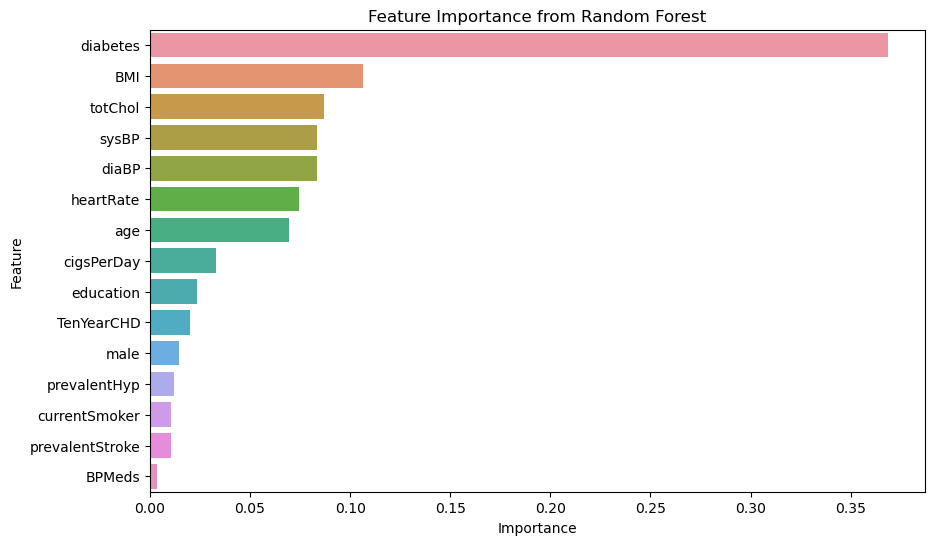

In [14]:
# Step 8: Feature Importance (Random Forest)

importances = forest_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title("Feature Importance from Random Forest")
plt.show()

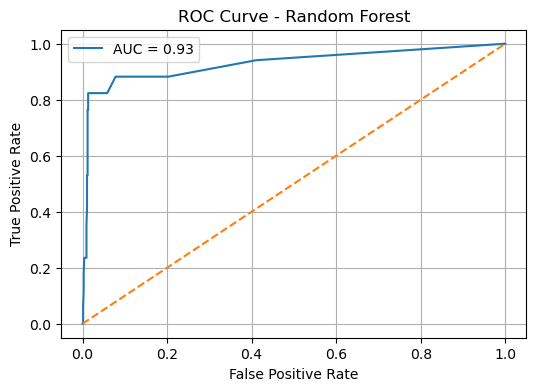

In [16]:
# Step 9: ROC Curve for Random Forest
y_prob_rf = forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.show()




# Conclusion
## Exploration:

Through exploratory data analysis, we identified key health indicators such as BMI, systolic blood pressure, and age as strong correlates of elevated glucose levels.


## Modeling:

We implemented multiple classification models, including logistic regression, decision tree, and random forest. Among them, Random Forest achieved the highest accuracy and offered clear insights through feature importance scores.


## Results:

The models showed promising performance in classifying individuals at risk of high glucose levels. The ROC curve and classification metrics supported the robustness of our results, especially for Random Forest.


## Impact:

Predictive models like these can play a critical role in early diagnosis, preventive healthcare, and risk stratification, enabling more informed clinical decision-making.


## Future Improvements
Advanced Models: 

Explore ensemble techniques like XGBoost or LightGBM for improved performance.


Hyperparameter Tuning: Use grid search or random search to optimize model parameters.


Feature Engineering: Incorporate interaction features or non-linear transformations.


External Data: Integrate additional datasets (e.g., dietary data, genetic info) to enhance predictive power.


Deployment: Package the model as a web app or API for clinical use.

Thank You